In [11]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [12]:
def calculate_2dft(input):
    ft = np.fft.ifftshift(input)
    ft = np.fft.fft2(ft)
    return np.fft.fftshift(ft)

def calculate_2dift(input):
    ift = np.fft.ifftshift(input)
    ift = np.fft.ifft2(ift)
    ift = np.fft.fftshift(ift)
    return ift.real

In [13]:
path1 = 'UTS_FILE/1-Rose.jpg'

image = cv2.imread(path1, 0)


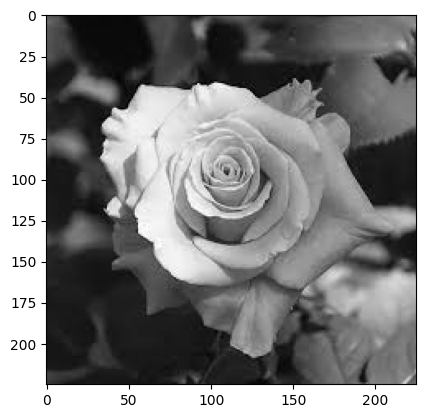

array([[ 91,  89,  86, ..., 126, 125, 127],
       [ 90,  89,  87, ..., 129, 128, 132],
       [ 92,  92,  91, ..., 133, 132, 130],
       ...,
       [ 62,  62,  60, ...,  92,  92,  98],
       [ 56,  55,  54, ...,  90, 105, 106],
       [ 58,  57,  56, ..., 104, 106, 108]], dtype=uint8)

In [14]:
plt.imshow(image, cmap='gray')
plt.show()
image


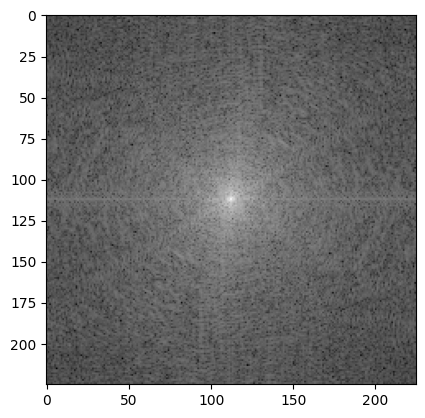

In [15]:
imageGray = image

# print(imageGray)

dft =  cv2.dft(np.float32(imageGray), flags=cv2.DFT_COMPLEX_OUTPUT)

dft_shift = np.fft.fftshift(dft)

# print(dft_shift)


mag, phase = cv2.cartToPolar(dft_shift[:,:,0], dft_shift[:,:, 1])


spec = np.log(mag)

# a = cv2.im('COMVIS-1_Done',spec)



plt.imshow(spec, cmap='gray')

mag = cv2.pow(mag, 1.1)

5772447.0 51257320.0
[[ 89  85  81 ... 121 118 117]
 [ 90  87  84 ... 124 121 121]
 [ 92  90  87 ... 127 125 121]
 ...
 [ 67  65  61 ...  99  95  96]
 [ 64  61  58 ...  97 103 101]
 [ 66  64  61 ... 107 106 103]]
[[ 91  89  86 ... 126 125 127]
 [ 90  89  87 ... 129 128 132]
 [ 92  92  91 ... 133 132 130]
 ...
 [ 62  62  60 ...  92  92  98]
 [ 56  55  54 ...  90 105 106]
 [ 58  57  56 ... 104 106 108]]


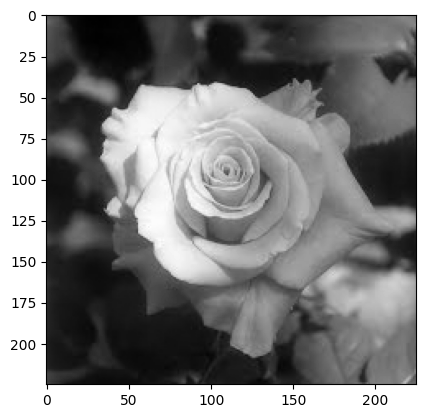

In [16]:
real, imag = cv2.polarToCart(mag, phase)

back = cv2.merge([real, imag])

back_shift = np.fft.ifftshift(back)

img_back = cv2.idft(back_shift)

img_back = cv2.magnitude(img_back[:,:,0], img_back[:,:,1])

min, max = np.amin(img_back, (0,1)), np.amax(img_back, (0,1))
print(min,max)

img_back = cv2.normalize(img_back, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)


# print(img_back)

plt.imshow(img_back, cmap='gray')

print(img_back)

print(imageGray)


(<Axes: >, <matplotlib.image.AxesImage at 0x2107fc1f410>)

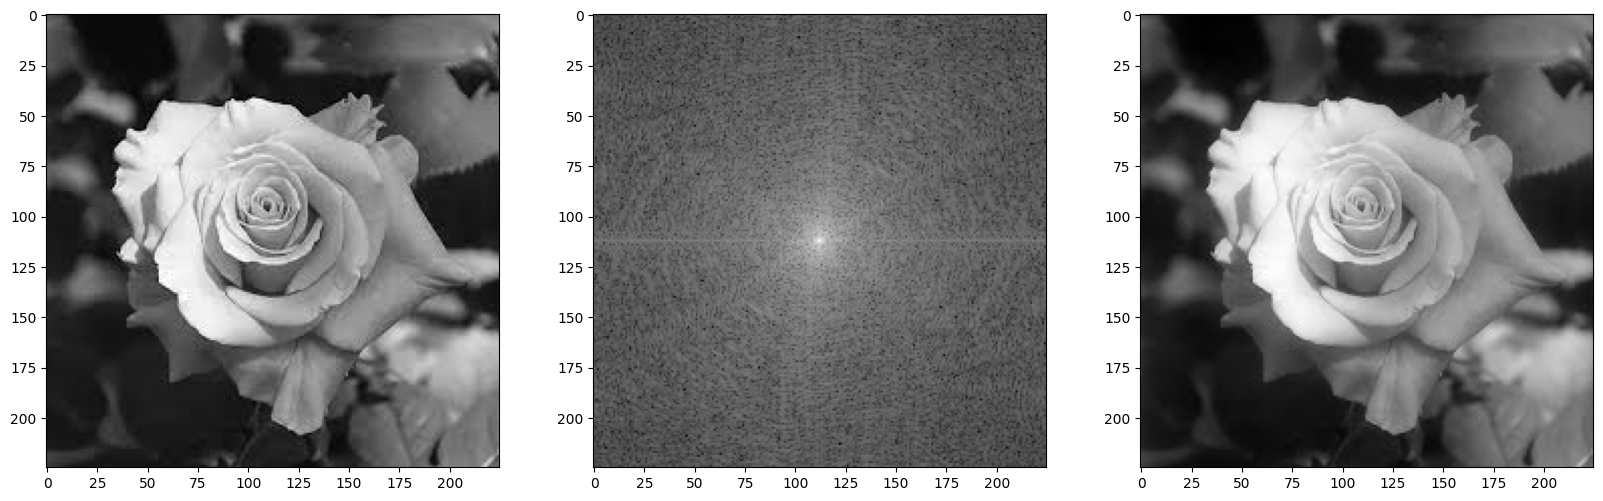

In [22]:
q = plt.figure(3, figsize=(20,20))



plt.subplot(331),plt.imshow(imageGray, cmap='gray')
plt.subplot(332), plt.imshow(spec, cmap='gray')
plt.subplot(333), plt.imshow(img_back, cmap='gray')


In [19]:
plt.figure(figsize=(20,10))
images = [image, spec, img_back]
columns = 5
for i, image in enumerate(images):
    plt.subplot(len(images) / columns + 1, columns, i + 1)
    plt.imshow(image)

ValueError: Number of rows must be a positive integer, not 1.6

<Figure size 2000x1000 with 0 Axes>

In [ ]:
a = np.fft.fft2(imageGray)


print(imageGray)

print(a)
print(a.shape)


def normalize(arr, t_min, t_max):
    norm_arr = []
    diff = t_max - t_min
    diff_arr = max(arr) - min(arr)    
    for i in arr:
        temp = (((i - min(arr))*diff)/diff_arr) + t_min
        norm_arr.append(temp)
    return norm_arr


b = np.fft.ifft2(a, norm='forward')







print(b)

[[ 91  89  86 ... 126 125 127]
 [ 90  89  87 ... 129 128 132]
 [ 92  92  91 ... 133 132 130]
 ...
 [ 62  62  60 ...  92  92  98]
 [ 56  55  54 ...  90 105 106]
 [ 58  57  56 ... 104 106 108]]
[[ 5041575.             +0.j          -652493.99464643+226284.38196193j
   -233050.47252308+596834.92469758j ...
    100637.23531123-204137.87003607j  -233050.47252308-596834.92469758j
   -652493.99464643-226284.38196193j]
 [-1013237.43251668-223390.97024736j   181556.24655301+531640.31356777j
    259472.18217844+142754.06750751j ...
    -78908.48465402-113065.28123438j   364829.88929148+138324.28878353j
    928208.47947084-187828.9598548j ]
 [ -330531.63126105+190278.94886388j   142135.39223792-117281.0970228j
     -6350.08023319-103963.28513429j ...
    128889.99457494 -65595.52559832j  -256694.27727804 -14144.1151231j
     89233.83494439 -65313.03643522j]
 ...
 [  229616.71252863-209260.70839265j  -215204.0886869  -24256.21032366j
    -48257.5983299   +9608.9716721j  ...
     20835.02530917 +81